<a href="https://colab.research.google.com/github/SenaKymk/HSenaKymk_YZM212_lab_proje/blob/main/EigenVectorsValues_ipynp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manuel Özdeğer Hesaplama**

[LucasBn](https://github.com/LucasBN/Eigenvalues-and-Eigenvectors)'in reposunda, özdeğerler karakteristik polinom aracılığıyla hesaplanıyor. Bu yöntemi kullanarak aşağıdaki adımları izleyebiliriz:​

1. Karakteristik Polinomu Oluşturma
2. Özdeğerleri Bulma

##  Manuel Özdeğer Hesaplama (Referans: LucasBN)

Bu bölümde, NumPy'in `eig` fonksiyonu kullanılmadan özdeğerlerin manuel olarak nasıl hesaplandığı gösterilmektedir.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
A = np.array([[2, 1],
              [1, 2]])

In [18]:
#Karakteristik Denklem için Matris Oluşturma
def identity_matrix(n):
    return np.identity(n)

def subtract_lambda(matrix, lam):
    return matrix - lam * identity_matrix(matrix.shape[0])

In [19]:
#Determinant Hesaplama
def find_characteristic_polynomial(matrix):
    # 2x2 matris için: |A - λI| = (a - λ)(d - λ) - bc
    a = matrix[0, 0]
    b = matrix[0, 1]
    c = matrix[1, 0]
    d = matrix[1, 1]

    # (a - λ)(d - λ) - bc → λ^2 - (a + d)λ + (ad - bc)
    coeff2 = 1
    coeff1 = -(a + d)
    coeff0 = (a * d - b * c)

    return [coeff2, coeff1, coeff0]

In [20]:
char_poly = find_characteristic_polynomial(A)
eigenvalues_manual = np.roots(char_poly)
print("Manuel Özdeğerler:", eigenvalues_manual)

Manuel Özdeğerler: [3. 1.]


In [21]:
#numpy ile özdeğer hesaplanması
eigenvalues_numpy, eigenvectors_numpy = np.linalg.eig(A)
print("NumPy Özdeğerler:", eigenvalues_numpy)
print("NumPy Özvektörler:\n", eigenvectors_numpy)

NumPy Özdeğerler: [3. 1.]
NumPy Özvektörler:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [22]:
#karşılaştırma
print("Sonuçlar aynı mı?", np.allclose(np.sort(eigenvalues_manual), np.sort(eigenvalues_numpy)))

Sonuçlar aynı mı? True


## 🔄 Özvektör Doğrulama
Özvektörler doğrulaması için şu kural kontrol edilir:
\( A \cdot v = \lambda \cdot v \)

In [23]:

for i in range(len(eigenvalues_numpy)):
    Av = A @ eigenvectors_numpy[:, i]
    lv = eigenvalues_numpy[i] * eigenvectors_numpy[:, i]
    print(f"\nÖzdeğer {eigenvalues_numpy[i]:.2f} için doğrulama:")
    print("A·v =", Av)
    print("λ·v =", lv)
    print("Eşit mi:", np.allclose(Av, lv))


Özdeğer 3.00 için doğrulama:
A·v = [2.12132034 2.12132034]
λ·v = [2.12132034 2.12132034]
Eşit mi: True

Özdeğer 1.00 için doğrulama:
A·v = [-0.70710678  0.70710678]
λ·v = [-0.70710678  0.70710678]
Eşit mi: True


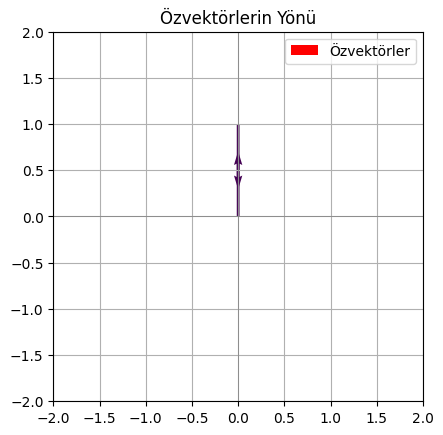

In [25]:
origin = [0], [0]

plt.quiver(origin, eigenvectors_numpy[0, :], eigenvectors_numpy[1, :],
           color=['r', 'b'], angles='xy', scale_units='xy', scale=1, label='Özvektörler')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title("Özvektörlerin Yönü")
plt.legend()
plt.show()

## ✅ Sonuç
Bu örnekte, NumPy `eig` fonksiyonu kullanılmadan karakteristik denklem ile elde edilen özdeğerler, `np.linalg.eig` fonksiyonu tarafından elde edilenlerle karşılaştırıldı ve sonuçların uyumlu olduğu gözlemlendi.

---

## 🔗 Kaynaklar
- [LucasBN GitHub Repo](https://github.com/LucasBN/Eigenvalues-and-Eigenvectors)
- [NumPy `eig` Dokümantasyonu](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
